In [ ]:
!pip install streamlit
#!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **DATA PREPROCESSING**


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
# Check for null values and data types
print("\nChecking for missing values:\n", df.isnull().sum())




Checking for missing values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [ ]:
print("\nData types:\n", df.dtypes)


Data types:
 N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


# FEATURE SELECTION


In [ ]:
X=df.iloc[:,2:-1]
X

,K,temperature,humidity,ph,rainfall
0,43,20.879744,82.002744,6.502985,202.935536
1,41,21.770462,80.319644,7.038096,226.655537
2,44,23.004459,82.320763,7.840207,263.964248
3,40,26.491096,80.158363,6.980401,242.864034
4,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...
2195,32,26.774637,66.413269,6.780064,177.774507
2196,27,27.417112,56.636362,6.086922,127.924610
2197,30,24.131797,67.225123,6.362608,173.322839
2198,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
y=df.iloc[:,-1]
y

,label
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
2195,coffee
2196,coffee
2197,coffee
2198,coffee


## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize features
standardized_features = StandardScaler().fit_transform(X)  # Returns a NumPy array
standardized_features = pd.DataFrame(standardized_features, columns=X.columns)  # Convert back to DataFrame
print(standardized_features)


             K  temperature  humidity        ph  rainfall
0    -0.101688    -0.935587  0.472666  0.043302  1.810361
1    -0.141185    -0.759646  0.397051  0.734873  2.242058
2    -0.081939    -0.515898  0.486954  1.771510  2.921066
3    -0.160933     0.172807  0.389805  0.660308  2.537048
4    -0.121436    -1.083647  0.454792  1.497868  2.898373
...        ...          ...       ...       ...       ...
2195 -0.318922     0.228814 -0.227709  0.401395  1.352437
2196 -0.417666     0.355720 -0.666947 -0.494413  0.445183
2197 -0.358420    -0.293218 -0.191235 -0.138120  1.271418
2198 -0.279425     0.129612 -0.869518  0.373904  0.431545
2199 -0.358420    -0.397667 -0.498020  0.401096  0.682005

[2200 rows x 5 columns]


# Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.19      , 0.34588614, 0.79026683, 0.46626364, 0.65645778],
       [0.18      , 0.37144489, 0.77063285, 0.54948026, 0.74167459],
       [0.195     , 0.4068539 , 0.79397664, 0.67421877, 0.87571039],
       ...,
       [0.125     , 0.43920235, 0.61788046, 0.44443315, 0.55007079],
       [0.145     , 0.50062653, 0.44175991, 0.50604494, 0.38428046],
       [0.125     , 0.42402921, 0.53822177, 0.50931694, 0.43372112]])

# **Outlier Detection**

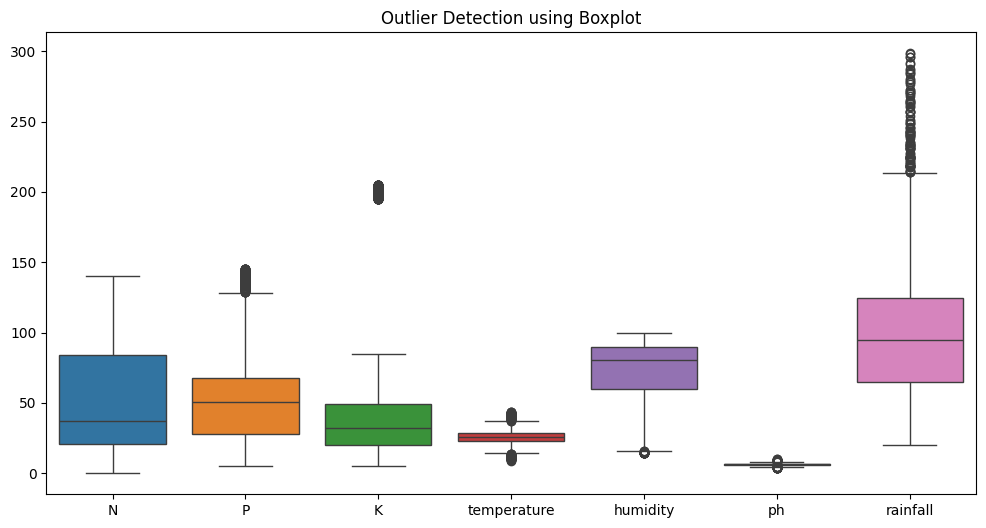

In [ ]:
# Check for outliers using boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Outlier Detection using Boxplot")
plt.show()


In [ ]:
# Detect outliers using IQR
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute Q1, Q3, and IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print("Number of Outliers in Each Numeric Feature:\n", outliers)


Number of Outliers in Each Numeric Feature:
 N                0
P              138
K              200
temperature     86
humidity        30
ph              57
rainfall       100
dtype: int64


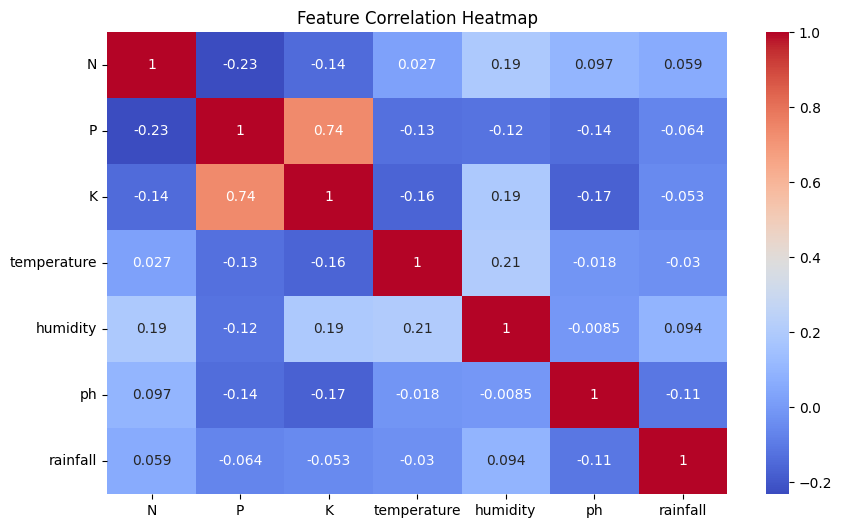

In [ ]:
# Heatmap of correlation between features

plt.figure(figsize=(10,6))
sns.heatmap(df.drop(columns=['label']).corr(), annot=True, cmap="coolwarm")

plt.title("Feature Correlation Heatmap")
plt.show()


# **Splitting the dataset into training and testing sets**

In [ ]:
# Split features and target
X = df.drop('label', axis=1)  # Features (N, P, K, temperature, humidity, pH, rainfall)
y = df['label']  # Target (Crop names)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# **Model Training and Comparison**

In [ ]:
# Train and compare multiple models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = name

print(f"\nBest Model: {best_model} with Accuracy: {best_accuracy:.2f}")

Random Forest Accuracy: 0.99
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        1

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.95
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.85      0.85      0.85        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.80      0.94      0.86        17
      grapes       1.00      1.00      1.00        14
        jute       0.87      0.87      0.87        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.77      0.91      0.83        11
       maize       0.94      0.81      0.87        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.91      0.88      0.89        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00   

# **Model Evaluation**

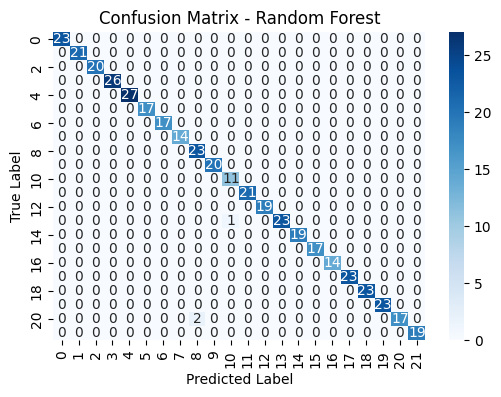

In [ ]:
# Confusion Matrix for the best model
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, models[best_model].predict(X_test)), annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

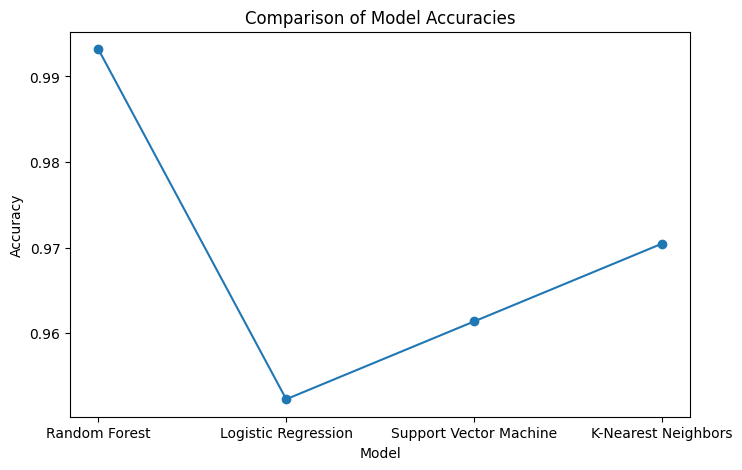

In [ ]:
# Line graph showing model performance
plt.figure(figsize=(8,5))
plt.plot(models.keys(), [accuracy_score(y_test, models[m].predict(X_test)) for m in models.keys()], marker='o', linestyle='-')
plt.title("Comparison of Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()


# **Model Deployment**

In [ ]:
pickle.dump(model, open('crop_recommendation.pkl', 'wb'))


In [ ]:
from google.colab import files
files.download("crop_recommendation.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>